In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F:/TGT AXP/Projects/Teleco Churn Cohort Analysis/Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

#Aim: Creating a predictor model to see which customers are prone to churn

#Step:1 EDA: Checking data_size, type, null and counts

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
# Since the dataset is not very large, we can skip type casting integers for memory conservation

In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# So no values are Null in our dataset. Thus we can avoid any steps to exclude / manage null values

<Axes: xlabel='Churn', ylabel='count'>

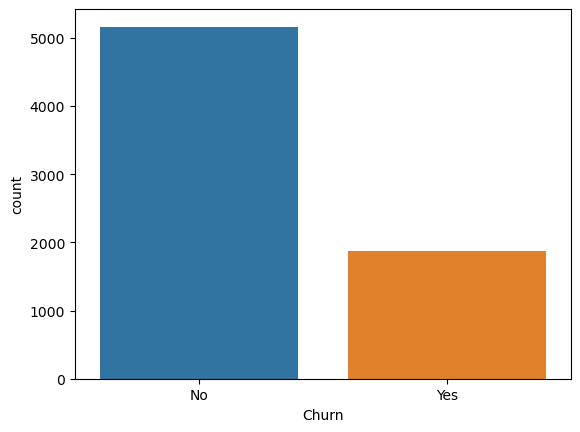

In [9]:
sns.countplot(data=df, x='Churn')

In [10]:
# Thus, our dataset is slighlty imbalanced. But not too extreme for us to use any undersampling, oversampling or SMOTE like techniques
# As a alternate, we can also use the class weights parameter in the model in case we donot want to do resampling

In [11]:
# Exploring the distribution of TotalCharges between Churn categories with a Box Plot or Violin Plot

<Axes: xlabel='Churn', ylabel='TotalCharges'>

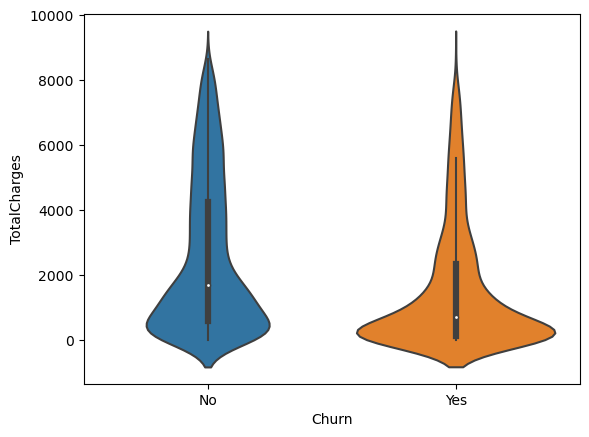

In [12]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

In [13]:
# Creating a boxplot showing distribution of Total Charges per contract tupe, with color based on Churn classabs

<Axes: xlabel='Contract', ylabel='TotalCharges'>

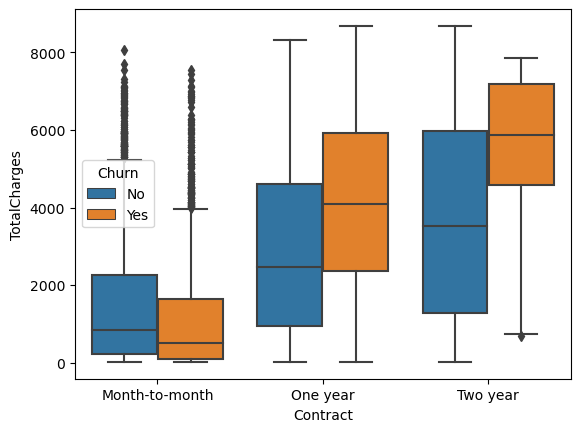

In [14]:
sns.boxplot(data=df, y='TotalCharges', x='Contract', hue='Churn')

In [15]:
# Interpretation of above box plot is: Ona month on month basis, there is lesser difference in charges between people who have churned and people who have not churned. 
# However, on a longer term, people who have churned actually experienced highest total charges than those those who didn't.

In [16]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']], dtype=int)

#if I didn't mention dtype, it was returning Boolean output

SeniorCitizen  gender_Female  gender_Male  Partner_No  Partner_Yes  \
0                 0              1            0           0            1   
1                 0              0            1           1            0   
2                 0              0            1           1            0   
3                 0              0            1           1            0   
4                 0              1            0           1            0   
...             ...            ...          ...         ...          ...   
7027              0              0            1           0            1   
7028              0              1            0           0            1   
7029              0              1            0           0            1   
7030              1              0            1           0            1   
7031              0              0            1           1            0   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0                 1               0                1                 0   
1                 1               0                0                 1   
2                 1               0                0                 1   
3                 1               0                1                 0   
4                 1               0                0                 1   
...             ...             ...              ...               ...   
7027              0               1                0                 1   
7028              0               1                0                 1   
7029              0               1                1                 0   
7030              1               0                0                 1   
7031              1               0                0                 1   

      MultipleLines_No  ...  Contract_One year  Contract_Two year  \
0                    0  ...                  0                  0   
1                    1  ...                  1                  0   
2                    1  ...                  0                  0   
3                    0  ...                  1                  0   
4                    1  ...                  0                  0   
...                ...  ...                ...                ...   
7027                 0  ...                  1                  0   
7028                 0  ...                  1                  0   
7029                 0  ...                  0                  0   
7030                 0  ...                  0                  0   
7031                 1  ...                  0                  1   

      PaperlessBilling_No  PaperlessBilling_Yes  \
0                       0                     1   
1                       1                     0   
2                       0                     1   
3                       1                     0   
4                       0                     1   
...                   ...                   ...   
7027                    0                     1   
7028                    0                     1   
7029                    0                     1   
7030                    0                     1   
7031                    0                     1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7027                                        0   
7028                                        0   
7029                                        0   
7030                                        0   
7031                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1              

In [18]:
# Now since it is not a good idea to have correlation for both Churn_Yes and Churn_No, thus we use only CHurn_Yes

corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']], dtype=int).corr()

In [19]:
# Now we will only grab the churn yes column 

corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

In [20]:
# Now, we can drop first and last rows from above output

corr_yes_churn= corr_df['Churn_Yes'].sort_values().iloc[1:-1]

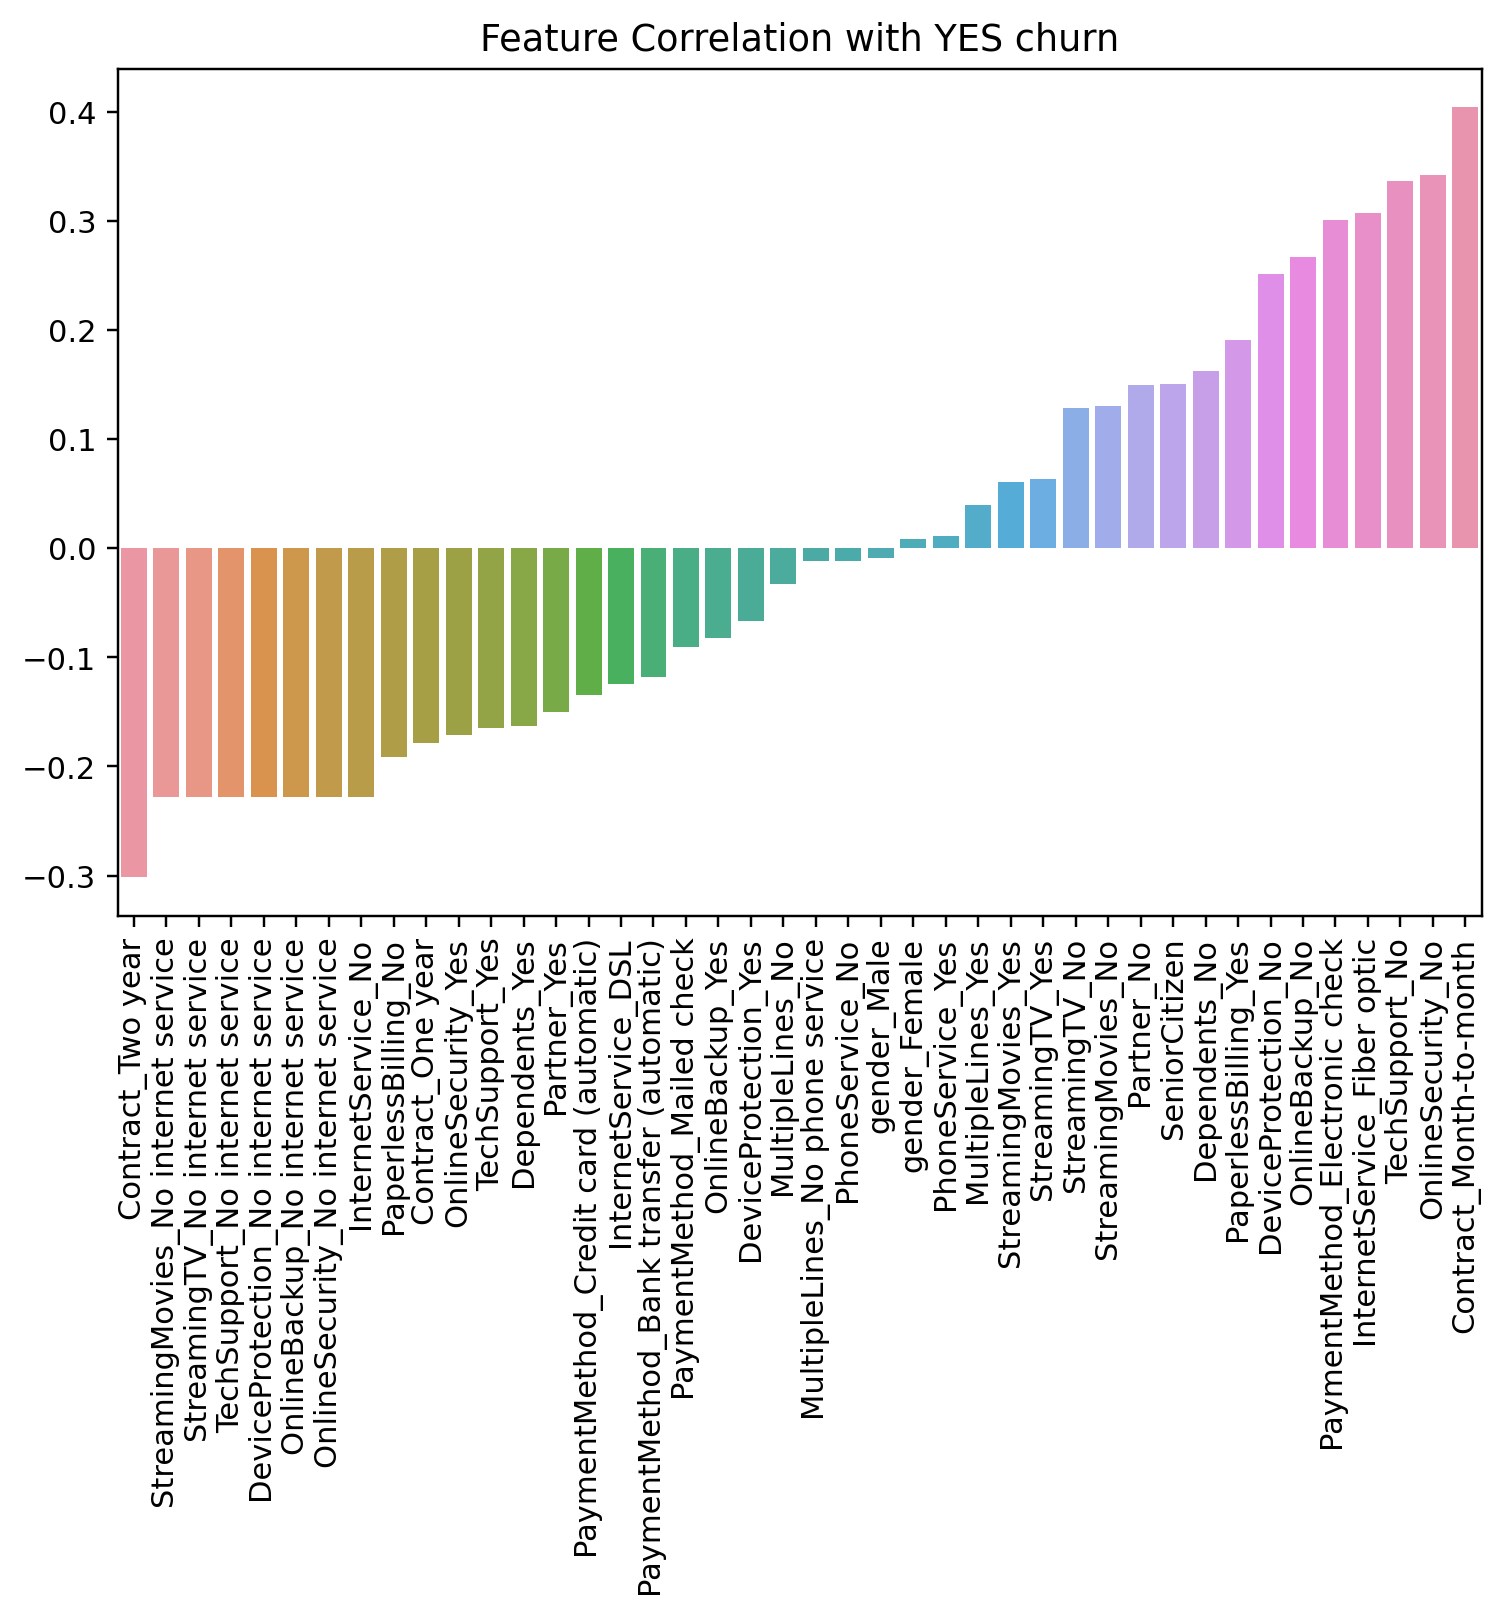

In [21]:
plt.figure(figsize=[8,5], dpi = 220)
plt.title("Feature Correlation with YES churn")
sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn.values)
plt.xticks(rotation=90);

In [22]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [23]:
# Lets create a histogram displaying distribution of tenure column, which is the amount of months a customer was or has been on a customer

<Axes: xlabel='tenure', ylabel='Count'>

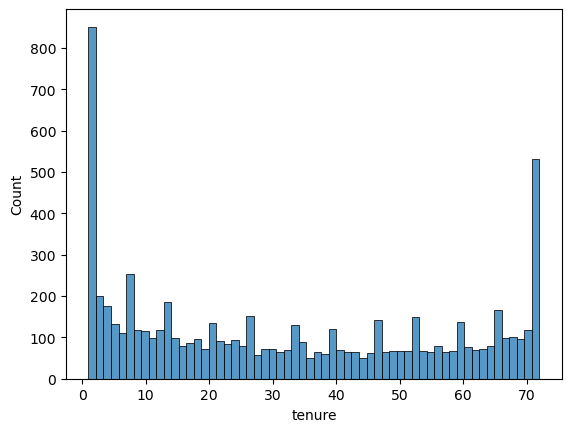

In [24]:
sns.histplot(data=df,x='tenure',bins=60)

In [25]:
# This shows that we have a very large number of people who have a very low tenure.However, this can't be classified a big problem since 
# we might be having customers who only had month to month requirement and thus they had enrolled only on a month-to-month contract

In [26]:
# Checking churn vs contract type to see if we have more churn across a specific contract type 

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


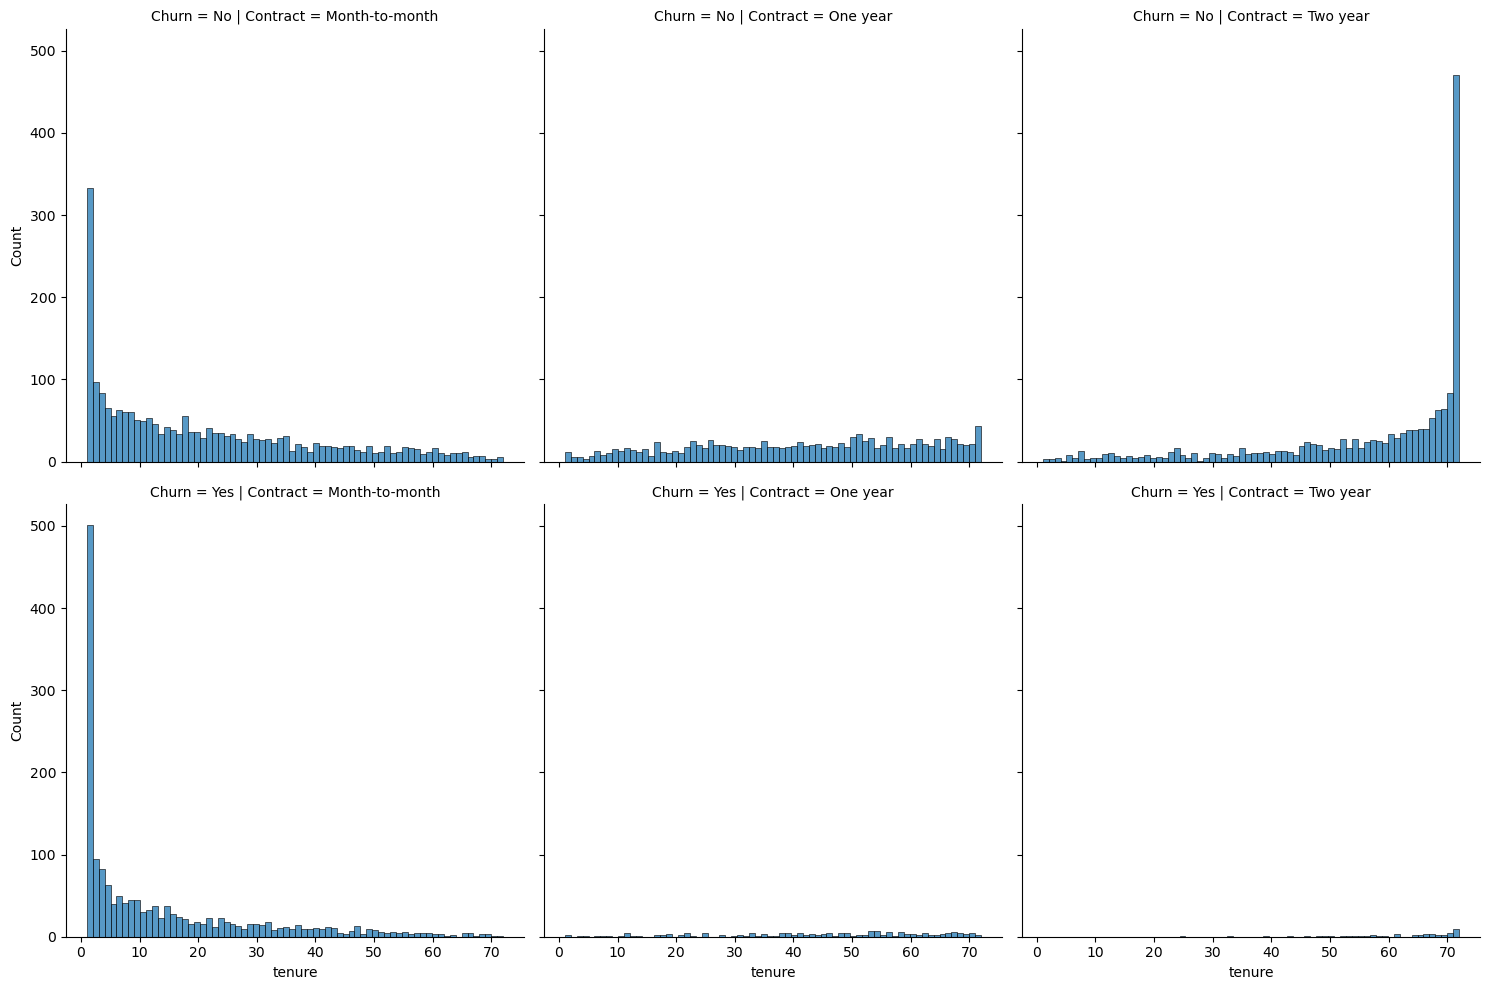

In [27]:
sns.displot(data=df, x='tenure',bins=70, col='Contract', row='Churn')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

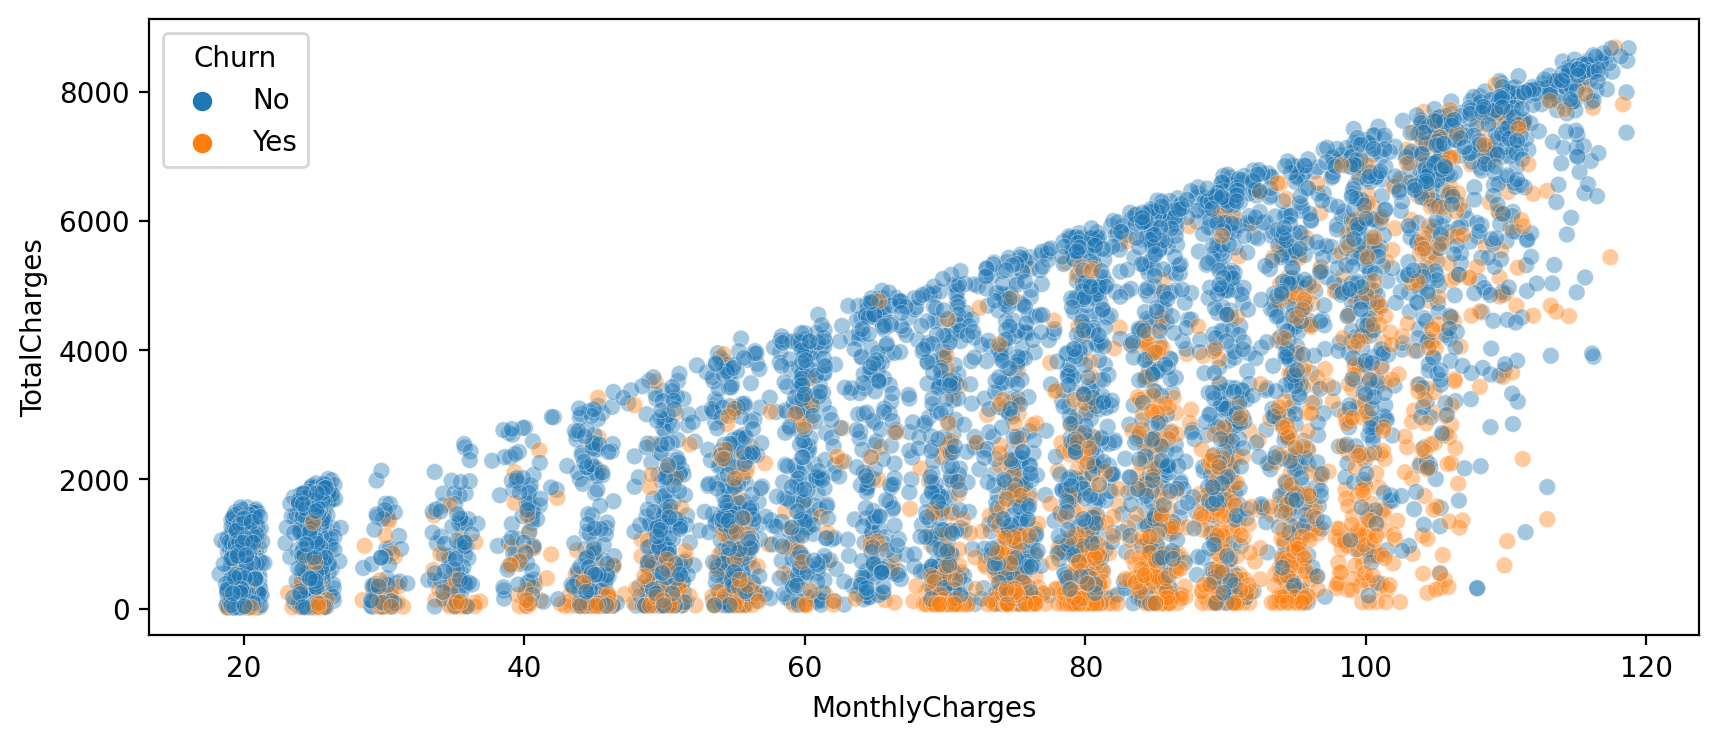

In [28]:
plt.figure(figsize=(10,4), dpi=200)

sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.4, linewidth=0.3)

In [29]:
# Above graph Shows, that people with high monthly charges ar emore likely to quit

In [30]:
# Lets try plotting a chart of Churn% vs tenure

In [31]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [32]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [33]:
churn_rate = 100*yes_churn/(no_churn+yes_churn)

In [34]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<Axes: xlabel='tenure'>

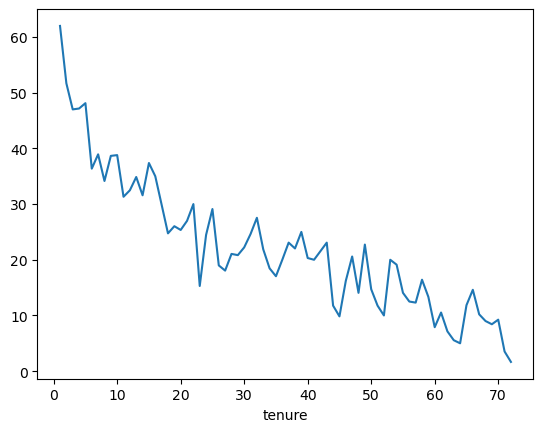

In [35]:
churn_rate.transpose()['customerID'].plot()

In [36]:
"""Creating own cohort based on tenure column values. We will create 4 separate categories:
1.) 0-12 Months
2.) 12-24 Months
3.) 24-48 Months
4.) Over 48 Months"""

'Creating own cohort based on tenure column values. We will create 4 separate categories:\n1.) 0-12 Months\n2.) 12-24 Months\n3.) 24-48 Months\n4.) Over 48 Months'

In [37]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    
    elif tenure<25:
        return '12-24 Months'
    
    elif tenure<49:
        return '24-48 Months'
    
    else:
        return 'Over 48 Months'

In [38]:
df['Tenure Cohort']=df['tenure'].apply(cohort)

In [39]:
df[['Tenure Cohort', 'tenure']]

Tenure Cohort  tenure
0        0-12 Months       1
1       24-48 Months      34
2        0-12 Months       2
3       24-48 Months      45
4        0-12 Months       2
...              ...     ...
7027    12-24 Months      24
7028  Over 48 Months      72
7029     0-12 Months      11
7030     0-12 Months       4
7031  Over 48 Months      66

[7032 rows x 2 columns]

In [40]:
# Now, lets try to create the same plot but this time we will color it by Tenure Cohort

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

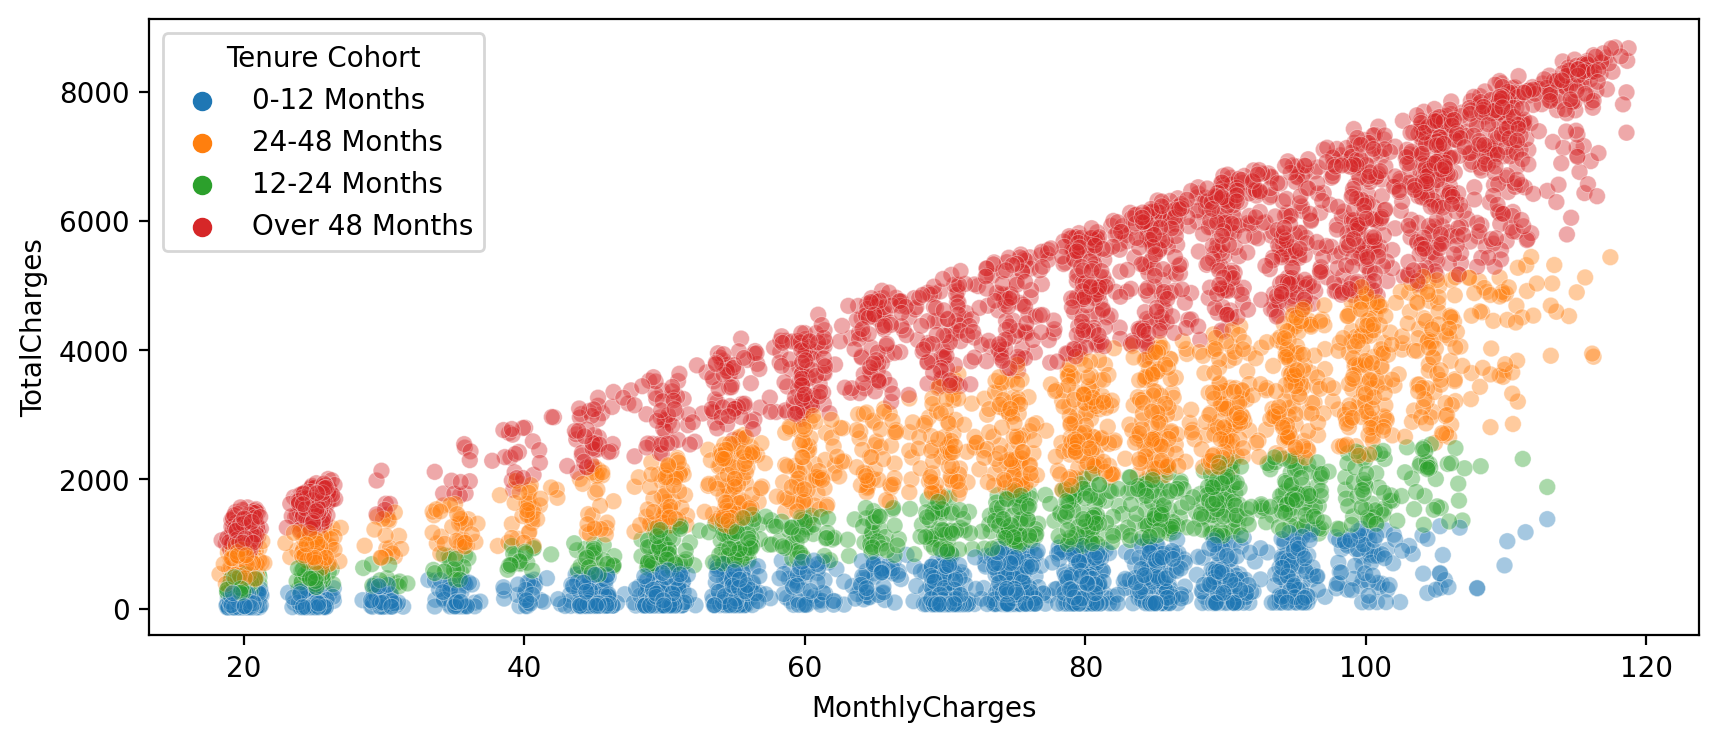

In [41]:
plt.figure(figsize=(10,4), dpi=200)

sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.4, linewidth=0.3)

In [42]:
# Creating a countplot showing churn rate per cohort

<Axes: xlabel='Tenure Cohort', ylabel='count'>

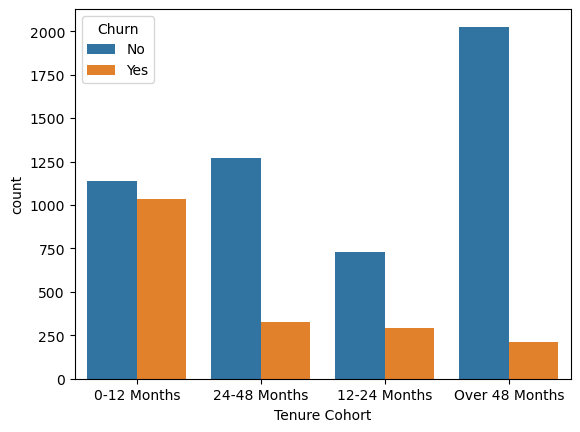

In [43]:
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

In [44]:
# The above chartshows that anyone on a 0-12 month tenure is way more likely to churn than anyone on a longer duration contract 

In [45]:
# Lets create a plot to see if people with larger contract periods have churned off much later than those at shorter contract periods

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


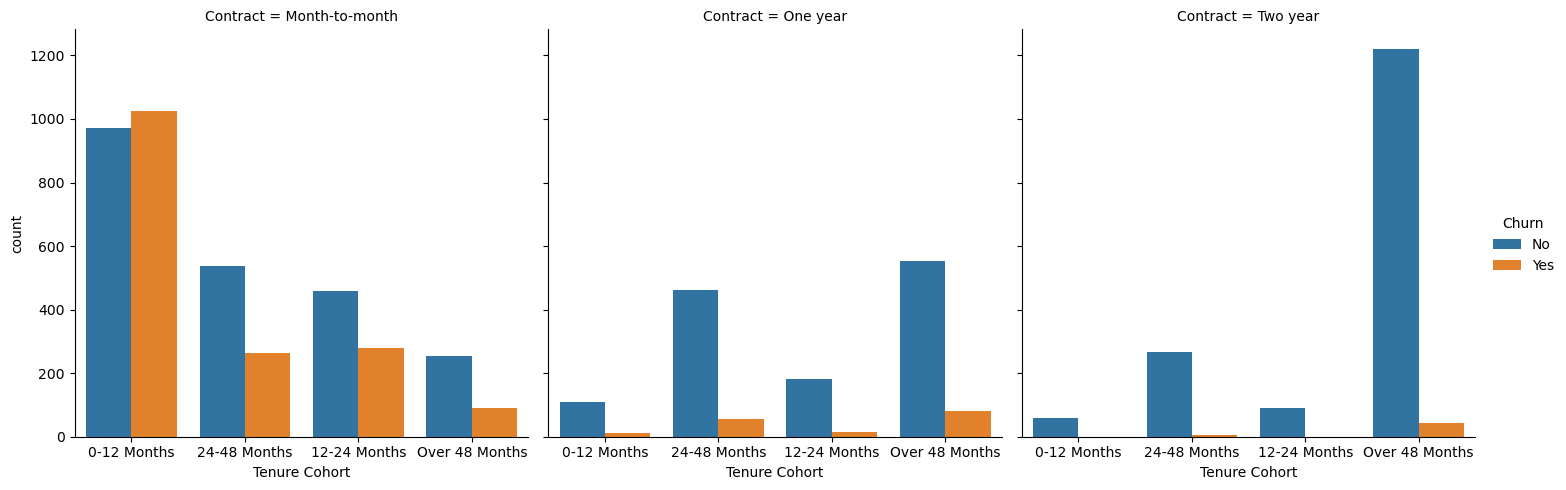

In [46]:
sns.catplot(data=df,x='Tenure Cohort', hue='Churn', kind='count', col='Contract')

In [47]:
X = df.drop(['Churn', 'customerID'], axis = 1)

In [48]:
X = pd.get_dummies(X, drop_first=True)

In [49]:
y = df['Churn']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [52]:
# 1 Trying to train a single decision Tree on dataset


In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier(max_depth=6)

In [55]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [60]:
preds=dt.predict(X_test)

In [61]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



In [62]:
# This shows that model is performing better on Class No, which is likely to be true for any model given as we have checked at the top that No class is dominant in the dataset we have 

In [69]:
cm=confusion_matrix(y_test,preds)

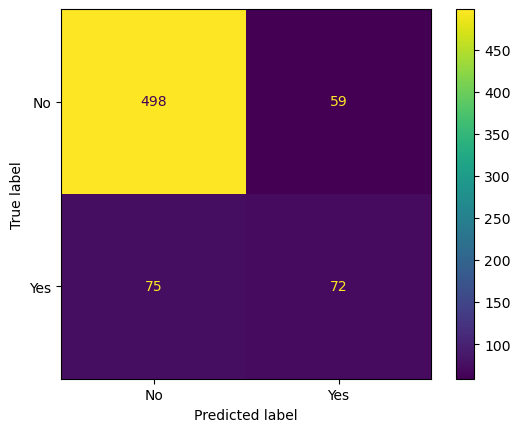

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=dt.classes_)
disp.plot()

In [78]:
# This helps us understand if we could offer some discounts or promotions to people who were likely to churn compared to those with lesser likelyhood to churn

In [79]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,
                        index=X.columns,
                        columns=['Feat Imp'])

In [87]:
imp_feats=imp_feats.sort_values('Feat Imp')

In [88]:
imp_feats=imp_feats[imp_feats['Feat Imp']>0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'gender_Male'),
  Text(1, 0, 'OnlineBackup_Yes'),
  Text(2, 0, 'PhoneService_Yes'),
  Text(3, 0, 'TechSupport_Yes'),
  Text(4, 0, 'OnlineSecurity_Yes'),
  Text(5, 0, 'Contract_One year'),
  Text(6, 0, 'SeniorCitizen'),
  Text(7, 0, 'MultipleLines_Yes'),
  Text(8, 0, 'TechSupport_No internet service'),
  Text(9, 0, 'Contract_Two year'),
  Text(10, 0, 'PaymentMethod_Electronic check'),
  Text(11, 0, 'MonthlyCharges'),
  Text(12, 0, 'TotalCharges'),
  Text(13, 0, 'InternetService_Fiber optic'),
  Text(14, 0, 'tenure')])

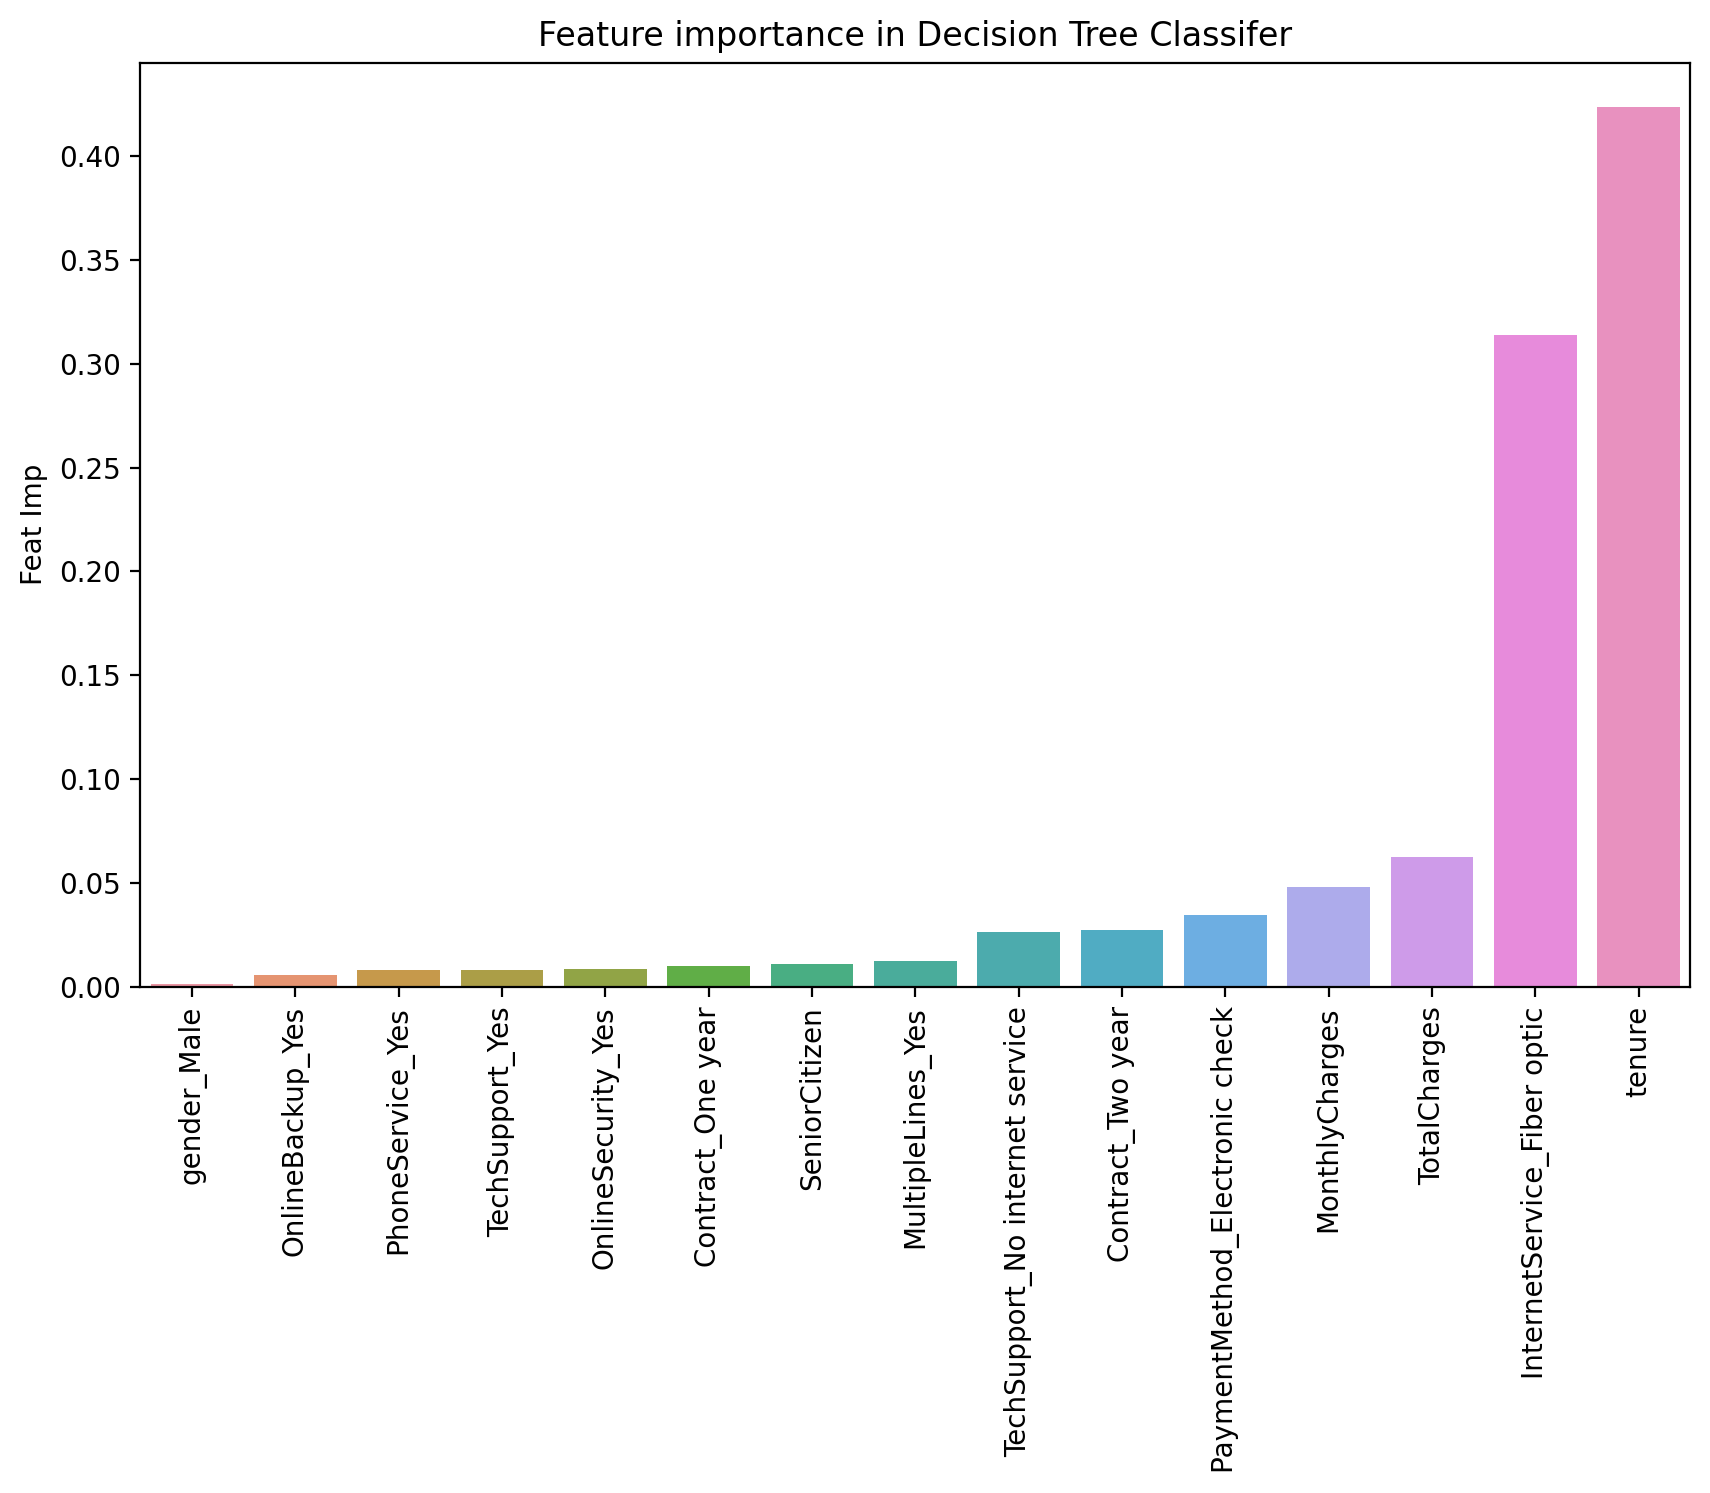

In [94]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=imp_feats,x=imp_feats.index,y='Feat Imp')
plt.title('Feature importance in Decision Tree Classifer')
plt.xticks (rotation=90)

In [95]:
# This also shows that people opting for Fiber optic services are actually a larger chunk of churn

In [96]:
from sklearn.tree import plot_tree

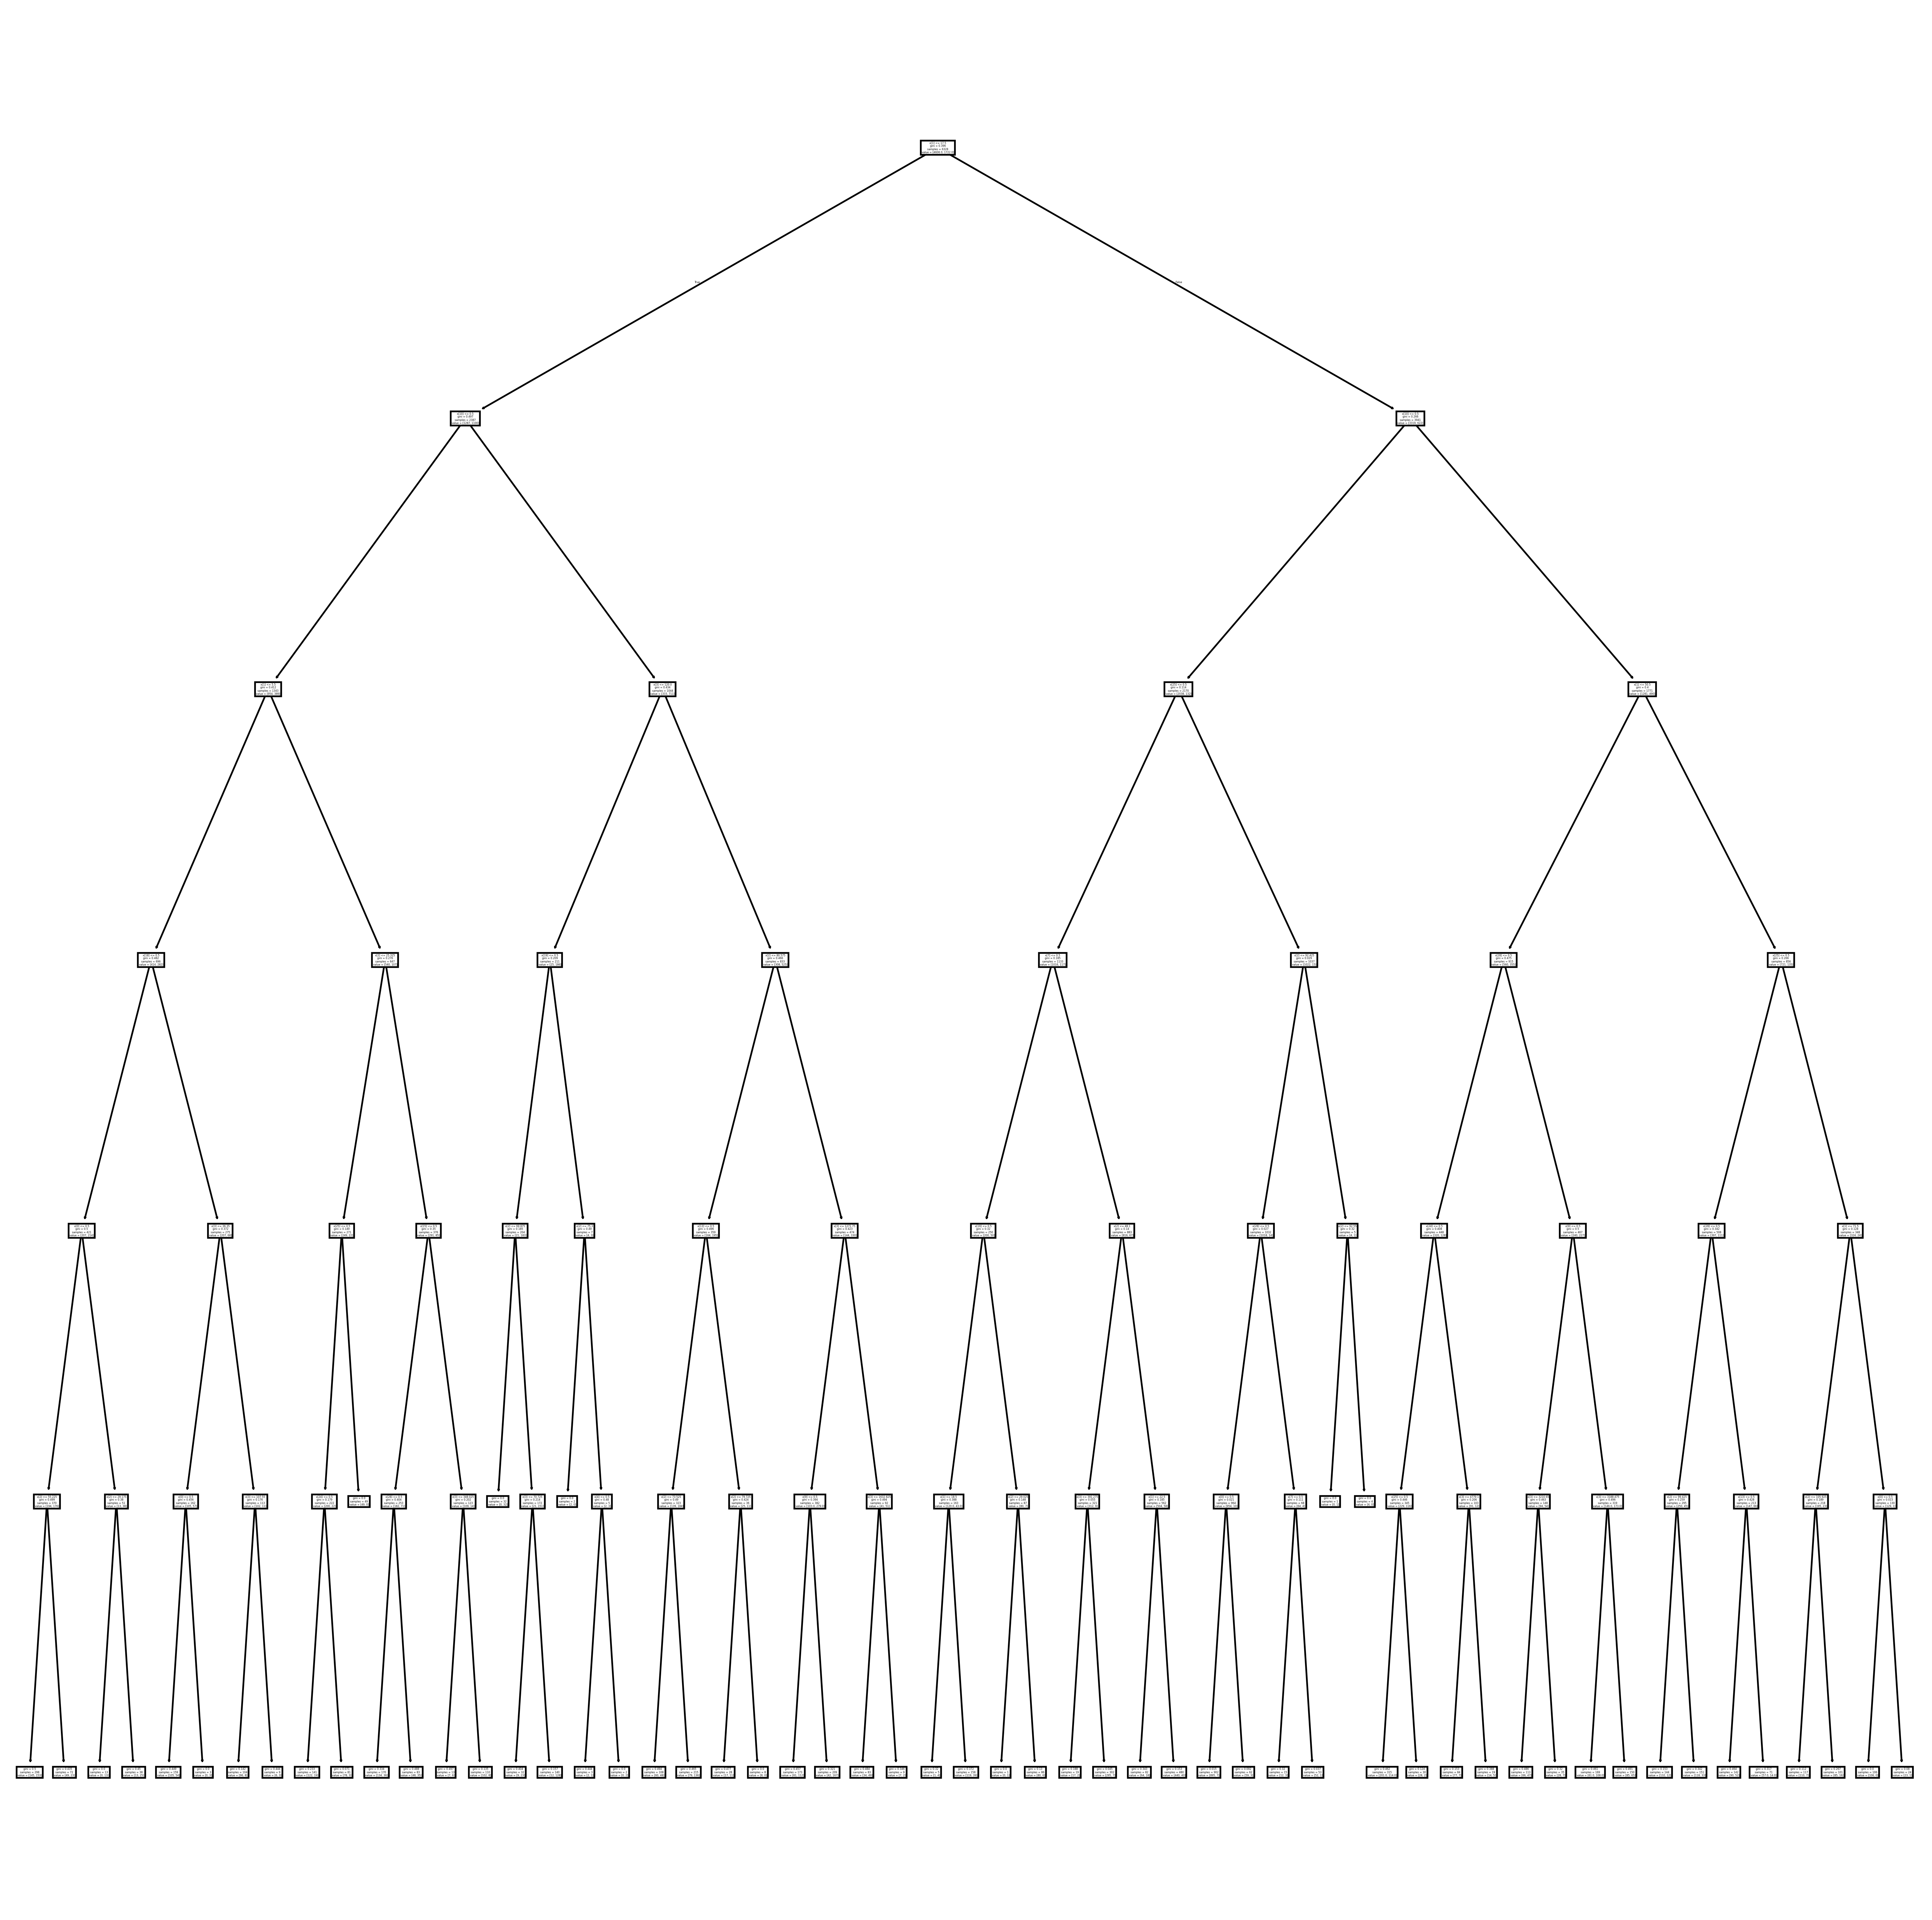

In [101]:
plt.figure(figsize=(20,20), dpi=400)
plot_tree(dt);

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf = RandomForestClassifier()

In [109]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [110]:
preds = rf.predict(X_test)

In [111]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.46      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



In [112]:
# This shows we are performing slighlty worse than a single decision tree 

In [113]:
# Now, lets try setting a max depth on the random forest classifier 

In [115]:
rf2 = RandomForestClassifier(max_depth=6)

In [116]:
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [118]:
preds = rf2.predict(X_test)

In [119]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.60      0.44      0.51       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



In [120]:
# Now, we can see we are getting a lot better f1-scores and precision values. However, recall has slighlty worsened but seems like a fair tradeoff

In [121]:
# However, if we look closely we were tring to improve recall of Yes, because Recall here means what percentage of actual churn are we able to predict

In [ ]:
# Lets try using boosting methods now:


In [122]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [123]:
ada_model = AdaBoostClassifier()

In [128]:
gb_model = GradientBoostingClassifier()

In [129]:
ada_model.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [130]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [131]:
ada_preds=ada_model.predict(X_test)

In [132]:
gb_preds=gb_model.predict(X_test)

In [134]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [135]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [137]:
# These models have better Yes recall than other models and also have good accuracy

In [138]:
# AdaBoost seems to have best "Yes" recall which is the most important metric for us.  

In [ ]:
"""Future To_Do tests:
1.) Using GridSearchCV on all models instead of using the default models we just used. 
2.) Trying other models like Logistic Regression and SVM Classifier to compare performances 
3.) Tring to adjust class weights in models or using resampling. 
"""